<a href="https://colab.research.google.com/github/Vlasovasona/Python-and-ML-Raschka/blob/main/%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BF%D0%B5%D1%80%D1%81%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD%D0%B0_%D0%A0%D0%BE%D0%B7%D0%B5%D0%BD%D0%B1%D0%BB%D0%B0%D1%82%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Реализация персептрона Розенблатта для бинарной классификации.



---



In [40]:
import numpy as np

In [41]:
class Perceptron(object):
  """Классификатор на основе персептрона.
  Параметры:
  ---------
  eta (float) : скорость обучения (между 0.0 и 1.0)
  n_iter (int) : проходы по обучающему набору данных.
  random_state (int) : начальное значение генератора случайных чисел для инициализации случайными весами.
  Атрибуты:
  --------
  w_ (int[]) : веса после подонки.
  errors_ (list()) : кол-во неправильных классификаций.
  """

  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """Подгоняет к обучающим данным
    Параметры
    ---------
    X {array-like}, shape = [n_examples, n_features] : обучающий вектор, где n_examples - кол-во образцов, n_features - кол-во признаков.
    y {array-like}, shape = [n_examples] : целевые значения.

    Возвращаемые значения
    ---------
    self : object
    """

    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = 0.0
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    """Вычисление фактического входа."""
    return np.dot(X, self.w_) + self.b_ # векторизиованная операция для вычисления скалярного произведения

  def predict(self, X):
    """Возвращает метки класса после шага."""
    return np.where(self.net_input(X) >= 0.0, 1, 0)

# Проверка на датасете Iris


---



In [42]:
import os
import pandas as pd

In [43]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(s, header=None, encoding='utf-8')

In [44]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
import matplotlib.pyplot as plt

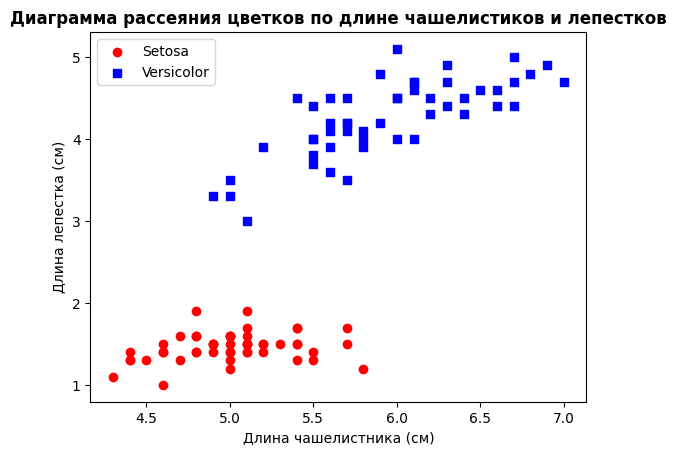

In [46]:
# выбираем setosa и versicolor (первые сто)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# извлекаем длину чашелистника и длину лепестка
X = df.iloc[0:100, [0,2]].values

# отображаем данные
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')
plt.xlabel('Длина чашелистника (см)')
plt.ylabel('Длина лепестка (см)')
plt.legend(loc='upper left')
plt.title(label="Диаграмма рассеяния цветков по длине чашелистиков и лепестков", fontweight='bold')
plt.show()

Линейный классификатор сможет отделить объекты разных классов друг от друга.

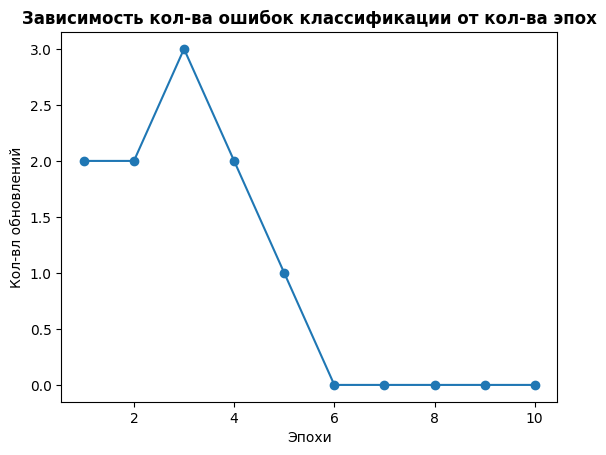

In [47]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("Эпохи")
plt.ylabel('Кол-вл обновлений')
plt.title(label="Зависимость кол-ва ошибок классификации от кол-ва эпох", fontweight='bold')
plt.show()

Персептрон сошелся после шестой эпохи. Напишем небольшую удобную функцию визуализации решающих границ для двумерных наборов дданных.

In [52]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # настройка генератора меток и цветовой карты
  markers = ['o', 's', '^', 'v', '<']
  colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # построение решающей поверхности
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution)) # создание матричных массивов
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # преобразование меток прогнозируемых классов в сетку с теми же размерами, что и xx1, xx2
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # построение образцов класса
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')


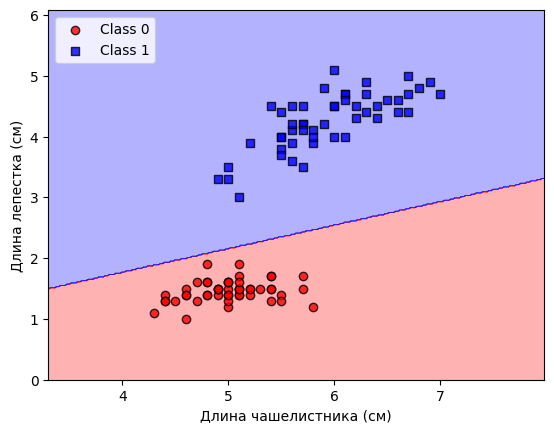

In [53]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Длина чашелистника (см)')
plt.ylabel('Длина лепестка (см)')
plt.legend(loc='upper left')
plt.show()

**Сходимость персептрона**

Хотя персептрон идеально классифицировал два класса цветков ириса, сходимость - одна из самых больших проблем персептрона. Розенблатт математически доказал, что правило обучения персептрона сходится, если два класса можно разделить линейной гиперплоскостью. В противном случае веса никогда не перестанут обновляться, если мы не установим максимальное кол-во эпох.